In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

The dataset we are given is related to heart disease of various patients with 14 attributes specified. Our goal is to create a model to find the presence of heart disease (values:1,2,3,4) or not(value:0) in a patient. 

In [2]:
#creating a dataframe from the csv file
ds=pd.read_csv('heart_disease.csv')
ds

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [3]:
#lets check the columns
ds.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

### Description of each column:-

1) age: age in years
 
2) sex: sex (1 = male; 0 = female)
 
3) cp: chest pain type
 
       -- Value 1: typical angina
       -- Value 2: atypical angina
       -- Value 3: non-anginal pain
       -- Value 4: asymptomatic
 
4) trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5) chol: serum cholestoral in mg/dl

6) fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7) restecg: resting electrocardiographic results
 
       -- Value 0: normal
       -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
       -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
 
8) thalach: maximum heart rate achieved 
 
9) exang: exercise induced angina (1 = yes; 0 = no)
 
10) oldpeak = ST depression induced by exercise relative to rest
 
11) slope: the slope of the peak exercise ST segment
 
       -- Value 1: upsloping
       -- Value 2: flat
       -- Value 3: downsloping
 
12) ca: number of major vessels (0-3) colored by flourosopy
 
13) thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
 
14) num: diagnosis of heart disease 

In [4]:
#lets find the information of attributes
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [5]:
ds['thal'].unique()

array(['?', '3', '7', '6'], dtype=object)

In [6]:
#by observation we can see that there are missing values marked by '?'.lets replace them with nan values.
ds=ds.replace('?',np.nan)
ds

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
#lets check how many missing values are present in each attribute.
ds.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

In [8]:
#lets check the datatypes
ds.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

Treating the missing data

In [9]:
#treating ca
print(ds['ca'].unique())
#since the 'ca' field has 198 missing rows and the rest 2 are value:0 ,this data has no relevance in predicting the target. Hence we can drop this field.
ds.drop(columns='ca',axis=1,inplace=True)


[nan '0']


In [10]:
#creating a list of categorical attributes
a=['thal','slope','exang','fbs']
#treating the nan values with most frequent values
for i in a:
    ds[i].fillna(ds[i].mode()[0],inplace=True)

In [11]:
#treating missing values in trestbps
ds['trestbps']=ds['trestbps'].astype(float)
ds['trestbps']=ds['trestbps'].replace(np.nan,ds['trestbps'].mean())
ds

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,1,4,140.000000,260,0,1,112,1,3,2,7,2
1,44,1,4,130.000000,209,0,1,127,0,0,2,7,0
2,60,1,4,132.000000,218,0,1,140,1,1.5,3,7,2
3,55,1,4,142.000000,228,0,1,149,1,2.5,1,7,1
4,66,1,3,110.000000,213,1,2,99,1,1.3,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.000000,333,1,1,154,0,0,2,7,1
196,62,1,1,133.763889,139,0,1,NaN,1,NaN,2,7,0
197,55,1,4,122.000000,223,1,1,100,0,0,2,6,2
198,58,1,4,133.763889,385,1,2,NaN,1,NaN,2,7,0


In [12]:
#treating missing values in chol
ds['chol']=ds['chol'].astype(float)
ds['chol']=ds['chol'].replace(np.nan,ds['chol'].mean())


In [13]:
#treating missing values in thalach
ds['thalach']=ds['thalach'].astype(float)
ds['thalach']=ds['thalach'].replace(np.nan,ds['thalach'].mean())


In [14]:
#treating missing values in oldpeak
ds['oldpeak']=ds['oldpeak'].astype(float)
ds['oldpeak']=ds['oldpeak'].replace(np.nan,ds['oldpeak'].mean())


In [15]:
ds

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,1,4,140.000000,260.0,0,1,112.000000,1,3.000000,2,7,2
1,44,1,4,130.000000,209.0,0,1,127.000000,0,0.000000,2,7,0
2,60,1,4,132.000000,218.0,0,1,140.000000,1,1.500000,3,7,2
3,55,1,4,142.000000,228.0,0,1,149.000000,1,2.500000,1,7,1
4,66,1,3,110.000000,213.0,1,2,99.000000,1,1.300000,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.000000,333.0,1,1,154.000000,0,0.000000,2,7,1
196,62,1,1,133.763889,139.0,0,1,122.795918,1,1.320833,2,7,0
197,55,1,4,122.000000,223.0,1,1,100.000000,0,0.000000,2,6,2
198,58,1,4,133.763889,385.0,1,2,122.795918,1,1.320833,2,7,0


In [16]:
#check for missing values
ds.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [17]:
#checking the datatypes
ds.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs          object
restecg       int64
thalach     float64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [18]:
#converting object datatypes into int
for i in a:
    ds[i]=ds[i].astype(int)

In [19]:
#checking the datatypes
ds.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int32
restecg       int64
thalach     float64
exang         int32
oldpeak     float64
slope         int32
thal          int32
num           int64
dtype: object

In [20]:
#replace the target variable into two categories: presence-1, absence-0
list=[1,2,3,4]
for i in list:
    ds['num']=ds['num'].replace(i,1)

In [21]:
ds

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,1,4,140.000000,260.0,0,1,112.000000,1,3.000000,2,7,1
1,44,1,4,130.000000,209.0,0,1,127.000000,0,0.000000,2,7,0
2,60,1,4,132.000000,218.0,0,1,140.000000,1,1.500000,3,7,1
3,55,1,4,142.000000,228.0,0,1,149.000000,1,2.500000,1,7,1
4,66,1,3,110.000000,213.0,1,2,99.000000,1,1.300000,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.000000,333.0,1,1,154.000000,0,0.000000,2,7,1
196,62,1,1,133.763889,139.0,0,1,122.795918,1,1.320833,2,7,0
197,55,1,4,122.000000,223.0,1,1,100.000000,0,0.000000,2,6,1
198,58,1,4,133.763889,385.0,1,2,122.795918,1,1.320833,2,7,0


In [22]:
#checking summary statistics
ds.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.340000,0.735000,122.795918,0.740000,1.320833,2.065000,6.880000,0.745000
std,7.811697,0.171015,0.795701,18.257507,112.011633,0.474898,0.683455,18.835692,0.439735,0.937755,0.471046,0.589353,0.436955
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,3.000000,0.000000
25%,55.000000,1.000000,3.000000,125.750000,129.250000,0.000000,0.000000,112.000000,0.000000,1.000000,2.000000,7.000000,0.000000
50%,60.000000,1.000000,4.000000,133.763889,214.000000,0.000000,1.000000,122.795918,1.000000,1.320833,2.000000,7.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,2.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,7.000000,1.000000


1. The mean is equal to median for trestbps,thalach,oldpeak .Hence there is no skewness in these datas
2. we can see a huge difference between 75th percentile and max value in chol which detects the presence of outliers in the data

In [23]:
#lets find the correlation
ds.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
age,1.000000,0.034230,-0.038280,0.181584,0.066972,0.135728,0.002400,-0.149949,0.129027,0.157087,0.107135,0.106313,0.189692
sex,0.034230,1.000000,0.038036,0.012585,-0.096150,-0.059400,0.060621,-0.001592,0.029402,0.097267,0.086709,-0.035898,0.098854
cp,-0.038280,0.038036,1.000000,0.074638,0.065818,-0.044416,0.034790,-0.123597,0.089904,0.040155,0.059460,-0.009430,0.256614
trestbps,0.181584,0.012585,0.074638,1.000000,0.150192,0.192337,0.092042,-0.013046,0.205900,0.115432,0.083459,0.068807,0.077757
chol,0.066972,-0.096150,0.065818,0.150192,1.000000,0.173396,0.024257,-0.041209,0.117050,0.002160,0.043363,-0.037535,0.018820
fbs,0.135728,-0.059400,-0.044416,0.192337,0.173396,1.000000,0.170616,0.037972,-0.176144,-0.105363,-0.009435,-0.033036,0.080883
restecg,0.002400,0.060621,0.034790,0.092042,0.024257,0.170616,1.000000,0.012348,-0.063203,-0.106991,-0.039881,0.020460,-0.059146
thalach,-0.149949,-0.001592,-0.123597,-0.013046,-0.041209,0.037972,0.012348,1.000000,-0.070142,0.172048,-0.107241,-0.177857,-0.041842
exang,0.129027,0.029402,0.089904,0.205900,0.117050,-0.176144,-0.063203,-0.070142,1.000000,0.289320,0.106259,0.150467,0.176270
oldpeak,0.157087,0.097267,0.040155,0.115432,0.002160,-0.105363,-0.106991,0.172048,0.289320,1.000000,0.292698,0.158020,0.212468


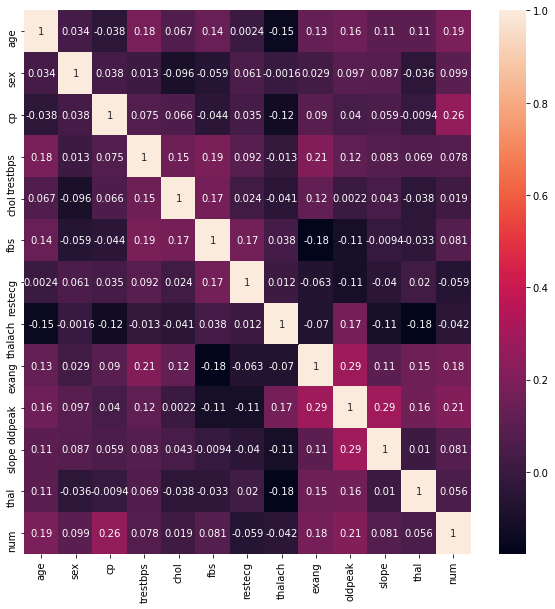

In [24]:
#lets visualize the correlation graphically
plt.figure(figsize=(10,10))
sns.heatmap(ds.corr(),annot=True)
plt.show()

1. restecg and thalach has negative correlation with the heart disease indication and rest others are positively correlated.
2. of the all attributes cp has higher positive correlation

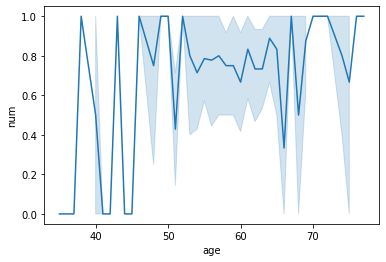

In [25]:
sns.lineplot(x='age',y='num',data=ds)

This shows a linear relationship of age vs num. So as age increases chances of heart disease to occur also increases. 

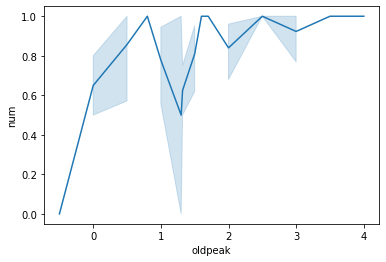

In [26]:
sns.lineplot(x='oldpeak',y='num',data=ds)

There is a strong linear dependancy of oldpeak against the heart disease

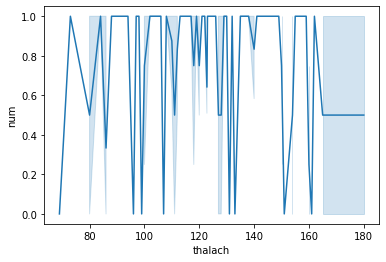

In [27]:
sns.lineplot(x='thalach',y='num',data=ds)

for a heart rate greater than 160 chances of having heart disease is less.

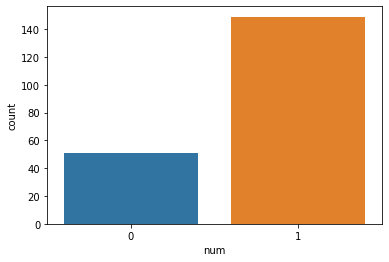

In [28]:
sns.countplot(x='num',data=ds)

Total number of patients who doesnt have heart disease is around 50.

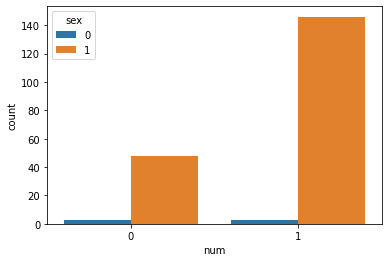

In [29]:
sns.countplot(x='num',hue='sex',data=ds)

The presence and absence of heart disease in female patients is same.

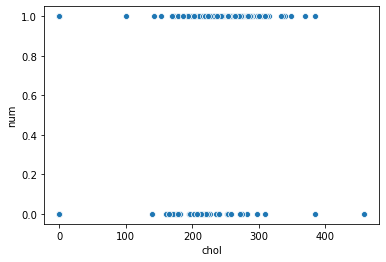

In [30]:
sns.scatterplot(x='chol',y='num',data=ds)

for cholestrol level greater than 170 mg/dl chances of having heart disease is high. 

lets check for outliers

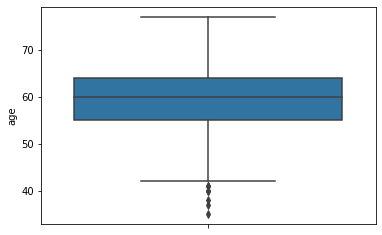

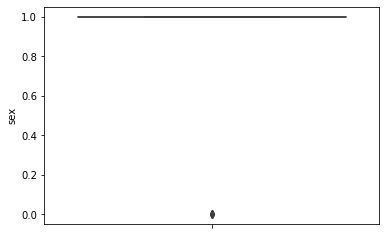

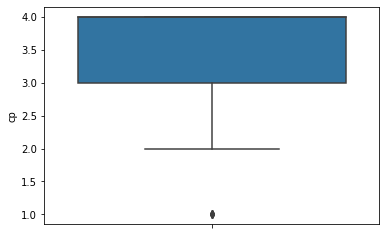

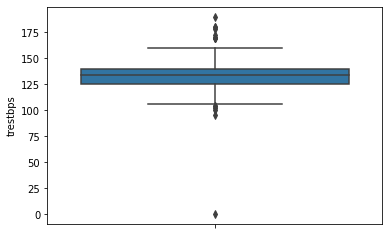

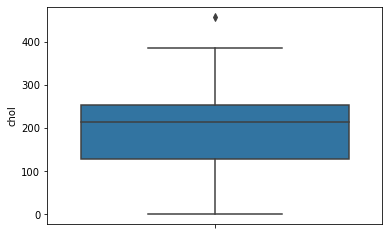

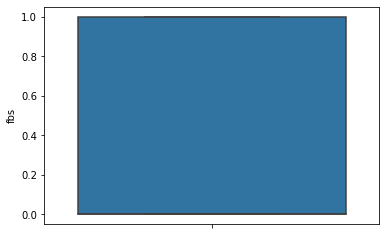

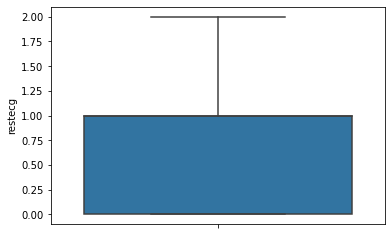

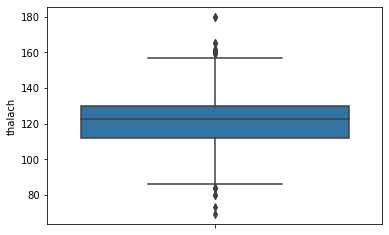

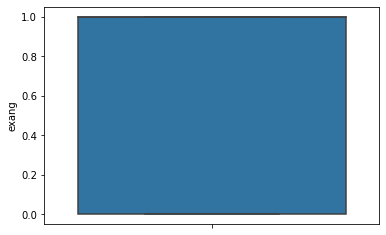

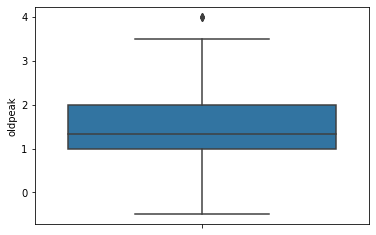

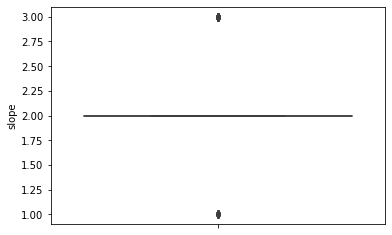

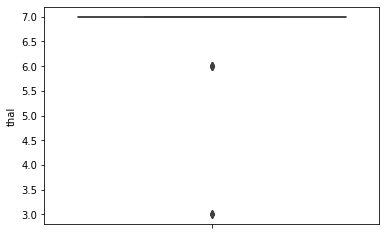

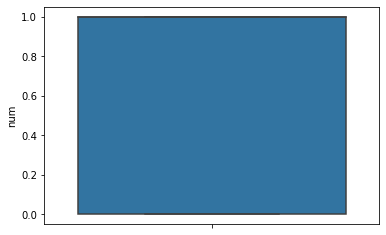

In [31]:
#plotting the boxplot for all attributes to check the outliers
for i in ds.columns:
    plt.figure()
    sns.boxplot(ds[i],orient="v")

In [32]:
#we can see certain outliers from the boxplot, we have to treat them
from scipy.stats import zscore
z_score=abs(zscore(ds))
print(ds.shape)

ds_final=ds.loc[(z_score<3).all(axis=1)]
print(ds_final.shape)

(200, 13)
(177, 13)


In [33]:
#removing the outliers and storing the new data in the old dataframe.
ds=ds_final
ds.shape

(177, 13)

In [34]:
#lets check for skewness
ds.skew()

age        -0.258590
sex         0.000000
cp         -1.439012
trestbps    0.509657
chol       -0.537742
fbs         0.740538
restecg     0.366437
thalach    -0.105998
exang      -1.245651
oldpeak     0.424375
slope       0.259104
thal       -4.416136
num        -1.283120
dtype: float64

the skewness is very little hence there is no need to treat them.

lets seperate the input and output data

In [35]:
#seperating target variables
y=ds.iloc[:,-1]
y

0      1
1      0
2      1
3      1
4      0
      ..
192    1
193    1
197    1
198    0
199    1
Name: num, Length: 177, dtype: int64

In [36]:
#seperating the input variables
ds_x=ds.iloc[:,0:-1]
ds_x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,63,1,4,140.000000,260.0,0,1,112.000000,1,3.000000,2,7
1,44,1,4,130.000000,209.0,0,1,127.000000,0,0.000000,2,7
2,60,1,4,132.000000,218.0,0,1,140.000000,1,1.500000,3,7
3,55,1,4,142.000000,228.0,0,1,149.000000,1,2.500000,1,7
4,66,1,3,110.000000,213.0,1,2,99.000000,1,1.300000,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...
192,53,1,4,144.000000,300.0,1,1,128.000000,1,1.500000,2,7
193,62,1,4,158.000000,170.0,0,1,138.000000,1,0.000000,2,7
197,55,1,4,122.000000,223.0,1,1,100.000000,0,0.000000,2,6
198,58,1,4,133.763889,385.0,1,2,122.795918,1,1.320833,2,7


In [37]:
#lets standardise the inputs using standard scaler before training into the model
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(ds_x)
x=pd.DataFrame(x,columns=ds_x.columns)

In [38]:
#standardised inputs
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,0.455808,0.0,0.606751,0.342887,0.742777,-0.698137,0.374532,-0.523570,0.557773,1.761409,-0.168736,0.217571
1,-2.069533,0.0,0.606751,-0.302209,0.286396,-0.698137,0.374532,0.325899,-1.792843,-1.399484,-0.168736,0.217571
2,0.057070,0.0,0.606751,-0.173190,0.366934,-0.698137,0.374532,1.062107,0.557773,0.180963,1.964568,0.217571
3,-0.607494,0.0,0.606751,0.471906,0.456421,-0.698137,0.374532,1.571788,0.557773,1.234594,-2.302040,0.217571
4,0.854546,0.0,-1.071295,-1.592402,0.322191,1.432384,1.847692,-1.259777,0.557773,-0.029764,-0.168736,0.217571
...,...,...,...,...,...,...,...,...,...,...,...,...
172,-0.873319,0.0,0.606751,0.600926,1.100724,1.432384,0.374532,0.382531,0.557773,0.180963,-0.168736,0.217571
173,0.322895,0.0,0.606751,1.504061,-0.062601,-0.698137,0.374532,0.948844,0.557773,-1.399484,-0.168736,0.217571
174,-0.607494,0.0,0.606751,-0.818286,0.411677,1.432384,0.374532,-1.203146,-1.792843,-1.399484,-0.168736,-4.596194
175,-0.208756,0.0,0.606751,-0.059402,1.861359,1.432384,1.847692,0.087817,0.557773,-0.007813,-0.168736,0.217571


In [39]:
#splitting the input and target variable into test and train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=47)
print(x_train.shape,'\t',x_test.shape)

(132, 12) 	 (45, 12)


In [40]:
print(y_train.shape,'\t',y_test.shape)

(132,) 	 (45,)


In [41]:
#importing libraries for models and error metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [42]:
#creating a for loop for all the models
model=[LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]
for m in model:
    m.fit(x_train,y_train)
    print('score of ',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Metrics:')
    print('Accuracy Score:',accuracy_score(y_test,predm))
    print('Confusion Matrix:',confusion_matrix(y_test,predm))
    print('Classification Report:',classification_report(y_test,predm))
    print('END OF THE MODEL----------------------------------- ')
    print('\n')

score of  LogisticRegression() is: 0.8257575757575758
Metrics:
Accuracy Score: 0.7555555555555555
Confusion Matrix: [[ 4  8]
 [ 3 30]]
Classification Report:               precision    recall  f1-score   support

           0       0.57      0.33      0.42        12
           1       0.79      0.91      0.85        33

    accuracy                           0.76        45
   macro avg       0.68      0.62      0.63        45
weighted avg       0.73      0.76      0.73        45

END OF THE MODEL----------------------------------- 


score of  SVC() is: 0.8560606060606061
Metrics:
Accuracy Score: 0.7555555555555555
Confusion Matrix: [[ 1 11]
 [ 0 33]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.08      0.15        12
           1       0.75      1.00      0.86        33

    accuracy                           0.76        45
   macro avg       0.88      0.54      0.51        45
weighted avg       0.82      0.76      0.67  

## Ensemble methods 

In [43]:
#using Random Forest Classifier
#best model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1000,random_state=47)
rfc.fit(x_train,y_train)
print('score:',rfc.score(x_train,y_train))
predrfc=rfc.predict(x_test)
print('\n')
print('Accuracy Score:',accuracy_score(y_test,predrfc))
print('Confusion Matrix:',confusion_matrix(y_test,predrfc))
print('Classification Report:',classification_report(y_test,predrfc))

score: 1.0


Accuracy Score: 0.8
Confusion Matrix: [[ 3  9]
 [ 0 33]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.25      0.40        12
           1       0.79      1.00      0.88        33

    accuracy                           0.80        45
   macro avg       0.89      0.62      0.64        45
weighted avg       0.84      0.80      0.75        45



In [44]:
from sklearn.ensemble import AdaBoostClassifier
svc_adb=SVC()
adbc=AdaBoostClassifier(base_estimator=svc_adb,algorithm='SAMME',n_estimators=1000,learning_rate=0.1,random_state=47)
adbc.fit(x_train,y_train)
print('score:',adbc.score(x_train,y_train))
predadbc=adbc.predict(x_test)
print('\n')
print('Accuracy Score:',accuracy_score(y_test,predadbc))
print('Confusion Matrix:',confusion_matrix(y_test,predadbc))
print('Classification Report:',classification_report(y_test,predadbc))

score: 0.7803030303030303


Accuracy Score: 0.7333333333333333
Confusion Matrix: [[ 0 12]
 [ 0 33]]
Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.73      1.00      0.85        33

    accuracy                           0.73        45
   macro avg       0.37      0.50      0.42        45
weighted avg       0.54      0.73      0.62        45



Of the above models random forest classifier has better accuracy score let us check cross validation scores.

In [45]:
#cross validating Random forest classifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,x,y,cv=10,scoring='accuracy')
print('Score:',score)
print('Mean Score:',score.mean())
print('Standard Deviation:',score.std())

Score: [0.77777778 0.83333333 0.77777778 0.88888889 0.72222222 0.66666667
 0.72222222 0.82352941 0.76470588 0.70588235]
Mean Score: 0.7683006535947712
Standard Deviation: 0.06362821467796848


The mean cross validation score is 0.76. This can be considered as a well fit and suitable model for training this dataset.

AUC ROC Curve

In [46]:
from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob=rfc.predict_proba(x_test)[:,1]
y_pred_prob

array([0.936, 0.959, 0.658, 0.754, 0.628, 0.452, 0.916, 0.618, 0.504,
       0.71 , 0.337, 0.924, 0.847, 0.976, 0.408, 0.904, 0.953, 0.821,
       0.914, 0.942, 0.752, 0.92 , 0.929, 0.606, 0.942, 0.756, 0.871,
       0.825, 0.949, 0.686, 0.822, 0.846, 0.834, 0.747, 0.637, 0.909,
       0.933, 0.617, 0.966, 0.926, 0.853, 0.622, 0.945, 0.929, 0.921])

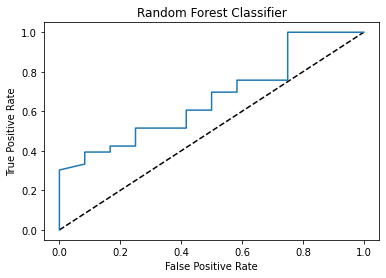

In [47]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [48]:
auc_score=roc_auc_score(y_test,rfc.predict(x_test))
print(auc_score)

0.625


The probability of predicting whether a person has hearat disease by using RFC model is 0.625

## Saving the model and result 

In [49]:
#saving the RFC model
import joblib
joblib.dump(rfc,'Heart_Disease.pkl')

['Heart_Disease.pkl']

In [50]:
#saving the output to csv file
pred_OP=pd.DataFrame(predrfc)
pred_OP.to_csv('Heart_Disease_prediction.csv')